In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [22]:
# 2. Load Dataset

df = pd.read_csv(r"C:\Users\kanak\Downloads\Superstore.csv", encoding='ISO-8859-1')

df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [23]:

# 3. Basic Info
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [24]:
# 4. Sales Overview
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

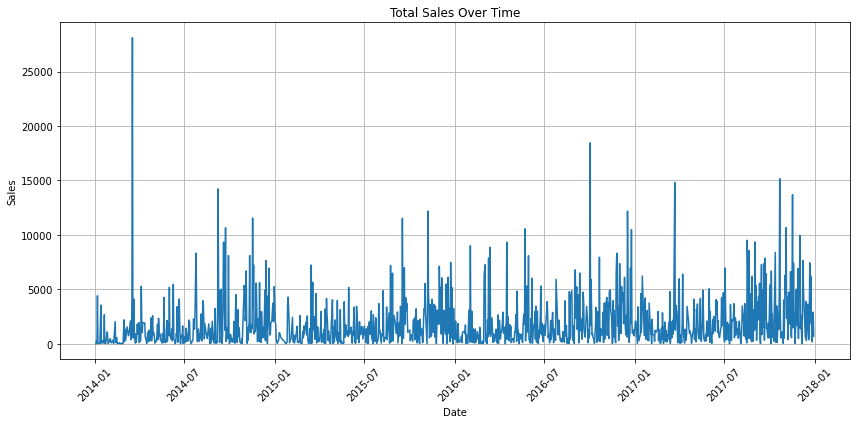

In [25]:
# 5. Total Sales Over Time
sales_over_time = df.groupby('Order Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(sales_over_time['Order Date'], sales_over_time['Sales'])
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


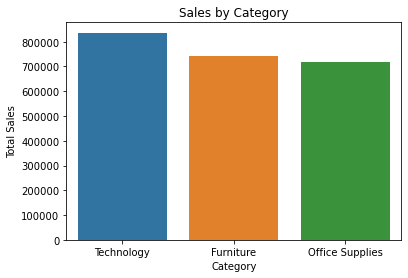

In [26]:
# 6. Top Performing Categories
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.show()


In [27]:
# 7. Sales by Region and State
region_sales = df.groupby('Region')['Sales'].sum()
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)

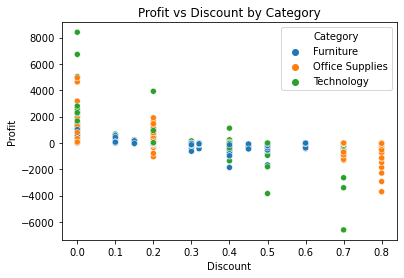

In [28]:
# 8. Profit vs Discount
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title("Profit vs Discount by Category")
plt.show()

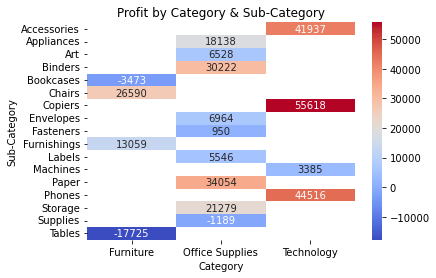

In [29]:
# 9. Profitability Heatmap (Category vs Sub-Category)
pivot = df.pivot_table(index='Sub-Category', columns='Category', values='Profit', aggfunc='sum')
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Profit by Category & Sub-Category")
plt.show()

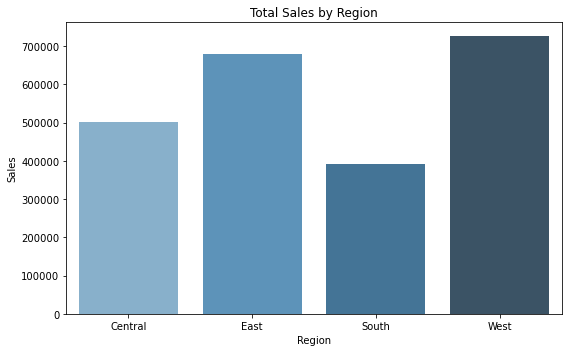

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


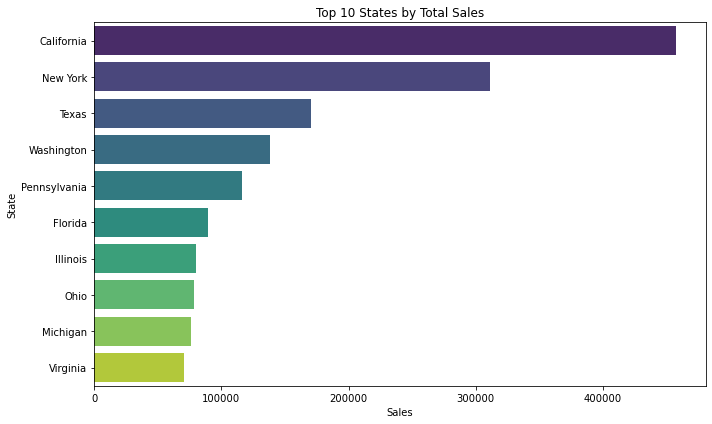

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title("Top 10 States by Total Sales")
plt.xlabel("Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()


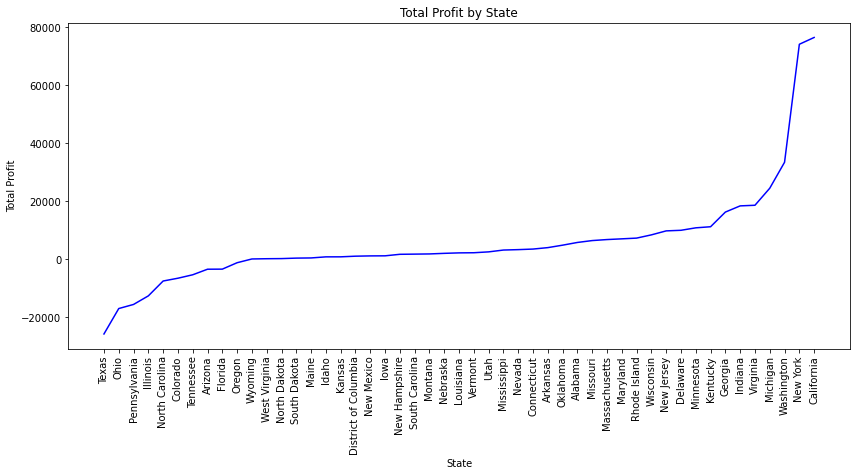

In [44]:
# Group and sort states by total profit
state_profit = df.groupby('State')['Profit'].sum().sort_values()

# Plot as line chart
plt.figure(figsize=(14, 6))
plt.plot(state_profit.index, state_profit.values, linestyle='-', color='blue')
plt.xticks(rotation=90)
plt.title("Total Profit by State")
plt.xlabel("State")
plt.ylabel("Total Profit")

# plt.tight_layout()
plt.show()


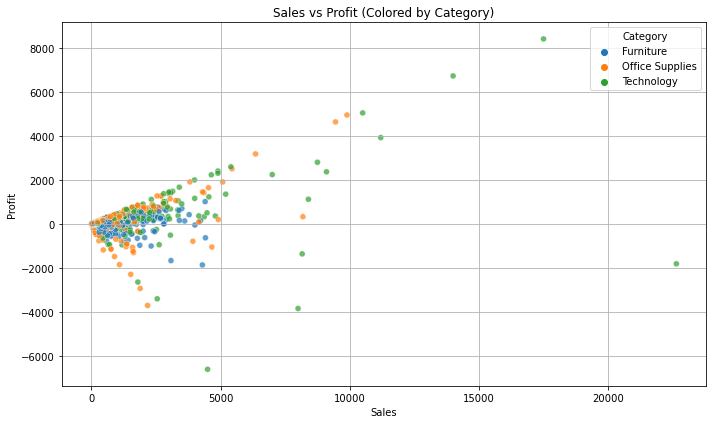

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', alpha=0.7)
plt.title("Sales vs Profit (Colored by Category)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


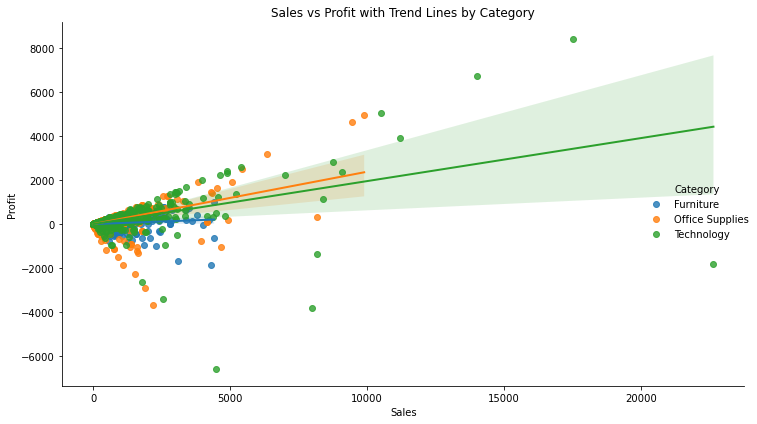

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df,
    x='Sales',
    y='Profit',
    hue='Category',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.5},
    line_kws={'linewidth': 2}
)

plt.title("Sales vs Profit with Trend Lines by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


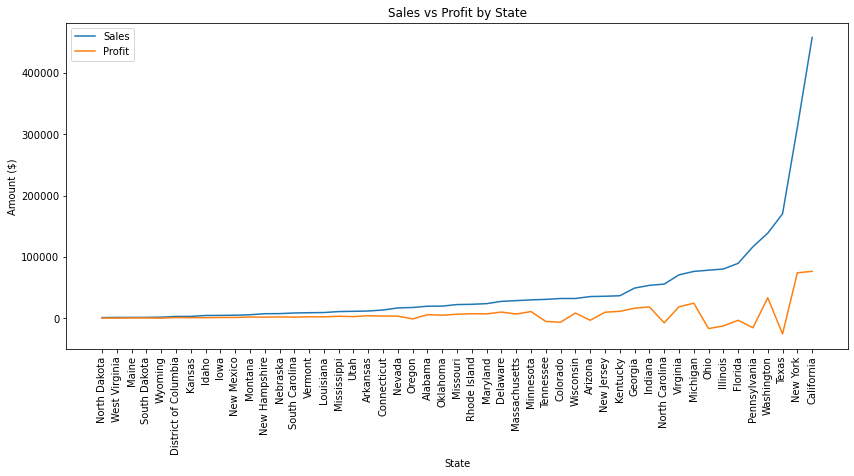

In [52]:
# Group by state
state_summary = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(state_summary.index, state_summary['Sales'], label='Sales')
plt.plot(state_summary.index, state_summary['Profit'], label='Profit')
plt.xticks(rotation=90)
plt.title("Sales vs Profit by State")
plt.xlabel("State")
plt.ylabel("Amount ($)")
plt.legend()
# plt.grid(True)
# plt.tight_layout()
plt.show()
